# Random Forest

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Imports

In [46]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import make_moons, load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, VotingClassifier, BaggingClassifier

In [3]:
X, y = make_moons(1000, noise=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Models

In [4]:
rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16).fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.975

In [12]:
# Ensemble of Extra trees and random forest
rf_clf, ext_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16),ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16)

voting_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('ext',ext_clf)],
    voting='hard'
)

for clf in (rf_clf, ext_clf, voting_clf):
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    score = accuracy_score(y_test, ypred)
    print(clf.__class__.__name__, score)

RandomForestClassifier 0.975
ExtraTreesClassifier 0.965
VotingClassifier 0.965


In [14]:
# bagging of random forests
bag_clf = BaggingClassifier(base_estimator=rf_clf).fit(X_train, y_train)
ypred = bag_clf.predict(X_test)
score = accuracy_score(y_test, ypred)
print(bag_clf.__class__.__name__, score)

BaggingClassifier 0.965


In [15]:
# bagging of extra trees
bag_clf = BaggingClassifier(base_estimator=ext_clf).fit(X_train, y_train)
ypred = bag_clf.predict(X_test)
score = accuracy_score(y_test, ypred)
print(bag_clf.__class__.__name__, score)

BaggingClassifier 0.965


In [27]:
# using cross validation 

rf_score = cross_val_score(rf_clf, X, y, cv=5)
ext_score = cross_val_score(ext_clf, X, y, cv=5)

In [28]:
print(f'random forest : {np.mean(rf_score):.2f}')
print(f'extra tree : {np.mean(ext_score):.2f}')

random forest : 0.99
extra tree : 0.98


## Feature Importance

In [31]:
iris = load_iris()
X, y = iris['data'], iris['target']

In [117]:
rf_clf = RandomForestClassifier(n_estimators=500).fit(X, y)
for name, score in sorted(zip(iris['feature_names'], rf_clf.feature_importances_)):
    print(name, score)

petal length (cm) 0.44432494445894277
petal width (cm) 0.4414374033376003
sepal length (cm) 0.08979678799422774
sepal width (cm) 0.024440864209229158


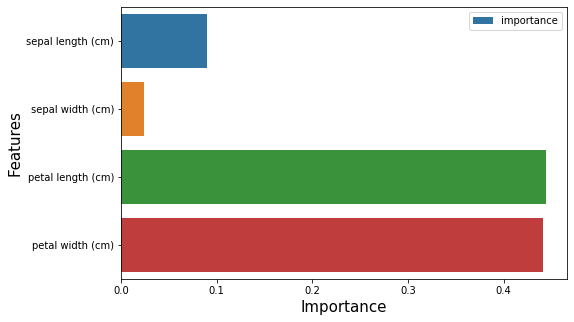

In [134]:
# implementing feature importance
data = {}
for i in range(1, len(iris['feature_names'])):
    data['name'] = iris['feature_names']
    data['imp'] = rf_clf.feature_importances_
    df = pd.DataFrame(data)
plt.figure(figsize=(8, 5))
sns.barplot(x='imp', y='name',data=df, label='importance')
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.legend()
plt.show()